<a href="https://colab.research.google.com/github/Pratham34/Tensorflow-Deep-Learning-notebooks/blob/main/08_introduction_to_nlp_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Fundamentals in TensorFlow

NLP has the goal of deriving informaton out of natural language (could be seqeuences , text or speech).

Another common term for NLP problems is sequence to sequence problems (seq2seq).

## Check for GPU

In [ ]:
!nvidia-smi -L 

GPU 0: Tesla T4 (UUID: GPU-a2a1be87-0fae-0af5-377e-8f5ee384926c)


## Get helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-02-08 03:57:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-08 03:57:39 (92.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset (text samples of Tweets labelled as diaster or not diaster).

See the original source here: https://www.kaggle.com/c/nlp-getting-started

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-02-08 03:57:43--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.159.128, 142.251.161.128, 74.125.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.159.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.02s   

2023-02-08 03:57:43 (36.9 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text dataset

To visualize our text samples, we first have to read them in, one way to do so would be to use Python: https://realpython.com/read-write-files-python/

But I prefer to get visual straight away.

So another way to do this is to use pandas...

In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# What does the test dataframe look like ?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each class are there ?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# How many total samples ?
len(train_df) , len(test_df)

(7613, 3263)

In [ ]:
# Let's visualize some random training examples
import random
random_index = random.randint(0,len(train_df)-5)  # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  # _ gets rid of the index
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
@HearItFromPatty Also pls help us w/ our campaign to warn the public about the hazardous keratin treatments. The Brazilian Blowout COPYCATS

---

Target: 0 (not real disaster)
Text:
Womens Cross Body Messengers Bags Clutch Small Shoulders Zippers Bags White http://t.co/EpIQdBxVZO http://t.co/BhfOYLQLJp

---

Target: 1 (real disaster)
Text:
#hot  C-130 specially modified to land in a stadium and rescue hostages in Iran in 1980 http://t.co/wpGvAyfkBQ #prebreak #best

---

Target: 0 (not real disaster)
Text:
RT: Our_Mother_Mary: Short Reading

Apocalypse 21:1023 

In the spirit the angel took me to the top of an enormous high mountain and... Û_

---

Target: 0 (not real disaster)
Text:
I added a video to a @YouTube playlist http://t.co/wedWyn9kfS World Of Tanks - Battle Assistant Mod Bat Chat Arti kaboom

---



### Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # use 10% of training data for validation split
                                                                            random_state=42)

In [ ]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# Check the first 10 samples 
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting text into numbers

When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.

There are a few ways to do this, namely:

* Tokeniziation - direct mapping of token (a token could be a word or a character) to number
* Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)

### Text vectorization (tokenization)

In [ ]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None,  # how many words in the vocabulary (automatically add <00V>)
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,  # create groups of n-words
                                    output_mode="int",  # how to map tokens to numbers
                                    output_sequence_length=None)  # how long do you want your sequences to be ?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [ ]:
train_sentences[0]

'@mogacola @zamtriossu i screamed after hitting tweet'

In [ ]:
train_sentences[0].split()

['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet']

In [ ]:
len(train_sentences[0].split())

7

In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000  # max number of words to have in our vocabulary [will take the most common 10000 words]
max_length = 15  # max length our sequences will be (e.g. how many words from a tweet does a model see ?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

Now we've got a text_vectorizer instance ready to go -> that's going to get the most common 10000 words from all of our tweets, convert them into integers and truncate all of our , or pad all of our sequences to max length, which is 15.

So the next step is to map this text_vectorizer or adapt it to our training data.

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my steet!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 hurricane?? sick!        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 346, 1173,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()   # get all of the unique words in our training data
top_5_words = words_in_vocab[:5]   # get the most common words
bottom_5_words = words_in_vocab[-5:]  # get the least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}") 

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Create an Embedding using an Embedding Layer

We've got a way to map our text to numbers. How about we go a step further and turn those numbers into an embedding?

The powerful thing about an embedding is it can be learned during training. This means rather than just being static (e.g. 1 = I, 2 = love, 3 = TensorFlow), a word's numeric representation can be improved as a model goes through data samples.

We can see what an embedding of a word looks like by using the tf.keras.layers.Embedding layer.

The main parameters we're concerned about here are:

* input_dim - The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).
* output_dim - The size of the output embedding vector, for example, a value of 100 , outputs a feature vector of size 100 for each word.
* embeddings_initializer - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
* input_length - Length of sequences being passed to embedding layer.
Knowing these, let's make an embedding layer.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,  # set input shape
                             output_dim=128,  # output shape
                             input_length=max_length  # how long is each input
                             )

embedding

In [ ]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
       \n\nEmbedded version:")

# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 i strongly support our military &amp; their families just not the cock suckers in DC they work for       

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.0018347 ,  0.04162428,  0.02541287, ..., -0.04355813,
          0.0434236 , -0.00162046],
        [-0.046629  ,  0.04809401, -0.00470842, ..., -0.04124364,
          0.04856706,  0.04005987],
        [ 0.02760159, -0.02870362,  0.03412868, ...,  0.00694982,
         -0.04527621,  0.01843506],
        ...,
        [ 0.00158191,  0.04582283,  0.04675037, ..., -0.04510404,
         -0.0099571 ,  0.00735112],
        [-0.00010372,  0.00964065,  0.04438407, ..., -0.00336636,
         -0.0211015 , -0.00112668],
        [-0.00198722, -0.02783599,  0.00477965, ...,  0.00509379,
         -0.00969784, -0.02805616]]], dtype=float32)>

In [ ]:
# shape - (1, 15, 128)
# 1 becoz when we passed in 1 sequence through text_vectorizer, it gets padded to be 15 tokens in length , and every single token in our sequence is now in the format of a 128 long vector

In [ ]:
# Check out a single token's embedding 
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.0018347 ,  0.04162428,  0.02541287,  0.00817361, -0.01969641,
        -0.0373449 , -0.02062576,  0.04917834,  0.01124567, -0.02841704,
        -0.00733231, -0.01919805,  0.01452689,  0.01083998,  0.01602257,
         0.04801308,  0.02662819, -0.04524153,  0.03728716,  0.01767608,
         0.04516837,  0.02372636, -0.01201793,  0.02111718, -0.04718071,
         0.01598047,  0.0367176 ,  0.01735053,  0.01773207,  0.03669587,
         0.00696591, -0.0068874 , -0.0437641 , -0.04011833, -0.04460355,
         0.02871979, -0.01301968,  0.00241735,  0.03409351,  0.00193077,
        -0.04243414, -0.04840337,  0.0373158 , -0.01918888, -0.00658231,
         0.04871723,  0.03088709,  0.03123002,  0.02588459, -0.0272122 ,
         0.0089612 ,  0.0170729 , -0.0072929 , -0.00491309, -0.01227551,
         0.02281673, -0.00763494,  0.00116775,  0.00958849,  0.00531436,
        -0.02046232, -0.04547308,  0.01204349, -0.04477955, -0.01619156,
  

And the principles here are the text vectorization or tokenization is converting words to some numerical format and then creating an embedding is making that just straight mapping, numerical format, making that learnable.

So there are two main takeaways - tokenization, straight mapping from Token to number.

Because remember, our models can't deal with just pure text and then in embedding creates a richer representation of the relationships between tokens and it can be learned.

## Modelling a text dataset (running a series of experiments)

Now we've got our data in numerical format, let's start building and comparing different models.

* Model 0: Naive Bayes (baseline) - got this from here: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional LSTM
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Word Embedding (feature extractor)
* Model 7: Same as model 6 but using 10% of data

For each of these models, we're going to be following the TensorFlow steps in modelling:

* Construct the model
* Train the model
* Make predictions with the model
* Track prediction evaluation metrics for later comparison

In [ ]:
# Note : text is a form of sequence data

### Model 0: Getting a baseline

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll create a Scikit-Learn Pipeline using the TF-IDF (term frequency-inverse document frequency) formula to convert our words(text) to numbers and then model them with the Multinomial Naive Bayes algorithm. This was chosen via referring to the Scikit-Learn machine learning map.

> **Note:** It's common practice to use non-DL algorithms as a baseline bacause of their speed and then later using DL to see if you can improve upon them. 

> 📖 Reading: The ins and outs of TF-IDF algorithm is beyond the scope of this notebook, however, the curious reader is encouraged to check out the Scikit-Learn documentation for more.

> Pipeline is basically do these steps in order, just like our keras sequential model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
    ("clf", MultinomialNB())  # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model
# (It takes a feature matrix X_test and the expected target values y_test. Predictions for X_test are compared with y_test and either accuracy (for classifiers) or R² score (for regression estimators is returned.)
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# Make predictions
# Predictions compare y_true vs y_pred !!

baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
train_labels

array([0, 0, 1, ..., 1, 1, 0])

### Creating an evaluation function for our model experiments

Let's make a function to evaluate our modelling experiment predictions using:

* Accuracy
* Precision
* Recall
* F1-score

For a deep overview of many different evaluation methods, see the Sklearn documentation: 
https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
# Function to evaluate: accuracy , precision , recall , f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  ----
  y_true = true labels in the form of a 1D array
  y_pred = predicted label in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall and f1-score between y_true and y_pred.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true,y_pred) * 100
  # Calculate model precision , recall , and f1-score using "weighted" average
  model_precision , model_recall, model_f1, _ = precision_recall_fscore_support(y_true,y_pred,average="weighted")
  model_results = {
      "accuracy":model_accuracy,
      "precision": model_precision,
      "recall": model_recall,
      "f1" : model_f1
  }
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: A simple dense model 

In [ ]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)  # inputs are 1-dimensional strings
x = text_vectorizer(inputs)  # turn the input text into numbers
x = embedding(x)  # create an embedding of the numberized inputs
# x = layers.GlobalMaxPool1D()(x)  # Condense the feature vector for each token to one vector
x = layers.GlobalAveragePooling1D()(x)  # Condense the feature vector for each token[15 vectors of 128 each] to one vector of 128(a single 128 long vector per sequence)  ->  i.e. 128 per token to 128 per sequence
outputs = layers.Dense(1, activation="sigmoid")(x)  # Create the output layer, want binary outputs so use sigmoid activation function
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20230208-035748
Epoch 1/5
215/215 [==============================] - 4s 5ms/step - loss: 0.6119 - accuracy: 0.6951 - val_loss: 0.5346 - val_accuracy: 0.7585
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.4393 - accuracy: 0.8197 - val_loss: 0.4706 - val_accuracy: 0.7927
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3453 - accuracy: 0.8615 - val_loss: 0.4580 - val_accuracy: 0.7940
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2829 - accuracy: 0.8908 - val_loss: 0.4613 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2361 - accuracy: 0.9127 - val_loss: 0.4777 - val_accuracy: 0.7782


In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.4777 - accuracy: 0.7782


[0.477662056684494, 0.778215229511261]

In [ ]:
# Make some predictions and evaluate these
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 4ms/step


(762, 1)

In [ ]:
# Look at a single prediction
model_1_pred_probs[0]

array([0.4211584], dtype=float32)

In [ ]:
# Look at the first 10 predictions
model_1_pred_probs[:10]

array([[0.4211584 ],
       [0.78084856],
       [0.9977356 ],
       [0.14953953],
       [0.10480297],
       [0.9443061 ],
       [0.9275986 ],
       [0.99357855],
       [0.9678506 ],
       [0.3073217 ]], dtype=float32)

In [ ]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate our model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 77.82152230971128,
 'precision': 0.7801652612118941,
 'recall': 0.7782152230971129,
 'f1': 0.7761410008648767}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
# Looks like our baseline model is outperforming our first deep learning model ... 
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab) ,words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of embedding layer 
# (these are the numerical representations of each token in our training data, which have been learned for ~5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights

array([[-0.03213926, -0.01892219, -0.01269024, ..., -0.05000892,
        -0.02342851,  0.00238282],
       [-0.0064974 , -0.01887024,  0.03187036, ..., -0.0434697 ,
        -0.03391195,  0.02014096],
       [ 0.02458712, -0.01284916, -0.00210565, ..., -0.00495811,
         0.00205324,  0.00308809],
       ...,
       [ 0.01610574,  0.03002275,  0.04097598, ...,  0.02216114,
        -0.0477181 ,  0.00666507],
       [-0.08351988, -0.01516502, -0.01051218, ...,  0.00693582,
        -0.00386451,  0.08078663],
       [-0.10594955, -0.04122133, -0.02271392, ..., -0.05837469,
         0.07552175,  0.06922492]], dtype=float32)

In [ ]:
# same size as vocab size and embedding_dim (output_dim of our embedding layer) 
embed_weights.shape  

(10000, 128)

In [ ]:
import io

# Code to save trained embeddings to file - we got this from here: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Let's download the saved embeddings locally
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Our visual word embeddings might not look like much to us, but they help our model understand the relationships between words.

For more on a popular type of word embedding and more visual explanations check out the illustrated word2vec:
* https://jalammar.github.io/illustrated-word2vec/
* https://www.tensorflow.org/tutorials/text/word_embeddings

## Recurrent Neural Networks (RNN's)

RNN's are useful for sequence data

The premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input

For a deeper understanding of what's happening behind the scenes of the code we're about to write, I'd recommend the following resources:

> 📖 Resources:

* [MIT Deep Learning Lecture on Recurrent Neural Networks](https://www.youtube.com/watch?v=SEnXr6v2ifU) - explains the background of recurrent neural networks and introduces LSTMs.
* [The Unreasonable Effectiveness of Recurrent Neural Networks by Andrej Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) - demonstrates the power of RNN's with examples generating various sequences.
* [Understanding LSTMs by Chris Olah](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) - an in-depth (and technical) look at the mechanics of the LSTM cell, possibly the most popular RNN building block.

### Model 2: LSTM

LSTM = long short-term memory

Our structure of a RNN typically looks like :

```
Input (text) -> Tokenize -> Embedding -> Layers (RNN/dense) -> Output(label probability)
```

In [ ]:
# Embedding - richer representations of our tokens mapped to the numbers

In [ ]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(f"After embedding: {x.shape}")
# x = layers.LSTM(64, activation="tanh", return_sequences=True)(x) # use return_sequences=True if you want to stack recurrent layers 
# print(f"After LSTM cell with return_sequences=True: {x.shape}")
x = layers.LSTM(64, activation="tanh")(x)
print(f"After LSTM cell: {x.shape}")
# x = layers.Dense(64, activation="relu")(x) # optional dense layer to have on top of LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs,outputs, name="model_2_LSTM")

After embedding: (None, 15, 128)
After LSTM cell: (None, 64)


In [ ]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230208-035804
Epoch 1/5
215/215 [==============================] - 11s 20ms/step - loss: 0.2170 - accuracy: 0.9235 - val_loss: 0.5865 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1545 - accuracy: 0.9418 - val_loss: 0.6668 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1244 - accuracy: 0.9524 - val_loss: 0.7050 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1097 - accuracy: 0.9565 - val_loss: 0.8245 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0836 - accuracy: 0.9656 - val_loss: 0.9412 - val_accuracy: 0.7848


In [ ]:
# Make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[1.2472609e-02],
       [8.7676257e-01],
       [9.9976081e-01],
       [1.1824308e-01],
       [6.1570125e-04],
       [9.9781185e-01],
       [8.6715728e-01],
       [9.9984038e-01],
       [9.9973053e-01],
       [7.7142507e-01]], dtype=float32)

In [ ]:
# Convert model_2_pred_probs to labels (Converting it so that we compare apples to apples)
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
# Calculate model_2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 78.4776902887139,
 'precision': 0.7857855246683945,
 'recall': 0.7847769028871391,
 'f1': 0.7832842389959473}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 3: GRU

GRU = Gated recurrent unit (one of the most popular and useful recurrent layer types)

The GRU cell has similar features to an LSTM cell but has less parameters.

📖 Resource: If you want to see the formula for Tanh, a great extension would be to replicate the function in pure TensorFlow, see here: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh

In [ ]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
x = layers.GRU(64)(x)
# x = layers.GRU(64, return_sequences=True)(x)  # if you want to stack recurrent layers on top of each other, you need return_sequences=True
# print(x.shape)
# x = layers.LSTM(42, return_sequences=True)(x)
# print(x.shape)
# x = layers.GRU(99)(x)
# print(x.shape) 
# x = layers.Dense(64, activation="relu")(x)
# x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
# Get a summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230208-035822
Epoch 1/5
215/215 [==============================] - 4s 8ms/step - loss: 0.1596 - accuracy: 0.9362 - val_loss: 0.7055 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0853 - accuracy: 0.9669 - val_loss: 0.8364 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0780 - accuracy: 0.9723 - val_loss: 0.8502 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0702 - accuracy: 0.9729 - val_loss: 0.9575 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0575 - accuracy: 0.9756 - val_loss: 1.0040 - val_accuracy: 0.7677


In [ ]:
# Make some predictions with our GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[3.8107107e-03],
       [6.5694344e-01],
       [9.9970561e-01],
       [5.1008202e-02],
       [2.5929639e-04],
       [9.9904519e-01],
       [6.6202712e-01],
       [9.9992204e-01],
       [9.9980325e-01],
       [6.0458940e-01]], dtype=float32)

In [ ]:
# Convert model_3_pred_probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 76.77165354330708,
 'precision': 0.7712255031085189,
 'recall': 0.7677165354330708,
 'f1': 0.7646846187166754}

### Model 4: Bidirectional RNN

A standard RNN will process a sequence from left to right, where as a bidirectional RNN will process the sequence from left to right and then again from right to left.

In [ ]:
# Build a bidirectional RNN in TensorFlow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
# print(x.shape)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [ ]:
# Get a summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230208-035835
Epoch 1/5
215/215 [==============================] - 6s 14ms/step - loss: 0.1054 - accuracy: 0.9693 - val_loss: 0.8917 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0553 - accuracy: 0.9771 - val_loss: 1.1757 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0470 - accuracy: 0.9784 - val_loss: 1.2765 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0449 - accuracy: 0.9787 - val_loss: 1.1800 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0403 - accuracy: 0.9806 - val_loss: 1.5976 - val_accuracy: 0.7612


In [ ]:
# Make predictions with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[1.1209588e-02],
       [7.4519110e-01],
       [9.9999034e-01],
       [1.3980584e-01],
       [3.1152347e-05],
       [9.9993253e-01],
       [9.9355000e-01],
       [9.9999607e-01],
       [9.9998999e-01],
       [9.9912840e-01]], dtype=float32)

In [ ]:
# Convert pred probs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate the results of our bidirectional model
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 76.11548556430446,
 'precision': 0.7607397912470243,
 'recall': 0.7611548556430446,
 'f1': 0.7606088477858584}

In [ ]:
model_3_results

{'accuracy': 76.77165354330708,
 'precision': 0.7712255031085189,
 'recall': 0.7677165354330708,
 'f1': 0.7646846187166754}

## Convolutional Neural Networks for Text (and other types of sequences)

You might've used convolutional neural networks (CNNs) for images before but they can also be used for sequences.

The main difference between using CNNs for images and sequences is the shape of the data. Images come in 2-dimensions (height x width) where as sequences are often 1-dimensional (a string of text).

So to use CNNs with sequences, we use a 1-dimensional convolution instead of a 2-dimensional convolution.

A typical CNN architecture for sequences will look like the following:

`Inputs (text) -> Tokenization -> Embedding -> Layers -> Outputs (class probabilities)`

You might be thinking "that just looks like the architecture layout we've been using for the other models..."

And you'd be right.

The difference again is in the layers component. Instead of using an LSTM or GRU cell, we're going to use a tensorflow.keras.layers.Conv1D() layer followed by a tensorflow.keras.layers.GlobablMaxPool1D() layer.

### Model 5: Conv1D

For different explanations of parameters see:
* cnn explainer website (this is for 2D but you can relate to 1D data )
* https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t#:~:text=VALID%20%3A%20Don't%20apply%20any,filter%20and%20stride%20you%20specified.

In [ ]:
# Test out our embedding layer , Conv1D layer and max pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))  # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5,  # this is also referred to as an ngram of 5 (meaning it looks at 5 words at a time)
                        strides=1,  # default
                        activation="relu",
                        padding="same")  # default = "valid" , the output is smaller than the input image, "same" means output is same shape as input
conv_1d_output = conv_1d(embedding_test)  # pass test embedding through conv1d layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)  # equivalent to "get the most important features" or "get the feature with the highest value"

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [ ]:
# embedding_test

In [ ]:
# conv_1d_output

In [ ]:
# max_pool_output

In [ ]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, strides=1, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our Conv1D model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230208-035852
Epoch 1/5
215/215 [==============================] - 3s 7ms/step - loss: 0.1182 - accuracy: 0.9634 - val_loss: 0.9116 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0731 - accuracy: 0.9730 - val_loss: 1.0497 - val_accuracy: 0.7612
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0602 - accuracy: 0.9768 - val_loss: 1.1228 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0530 - accuracy: 0.9785 - val_loss: 1.1808 - val_accuracy: 0.7546
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0539 - accuracy: 0.9774 - val_loss: 1.2389 - val_accuracy: 0.7625


In [ ]:
# Make some predictions with our Conv1D model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[1.5850925e-01],
       [9.0147799e-01],
       [9.9996185e-01],
       [5.9529785e-02],
       [9.8766385e-08],
       [9.9902380e-01],
       [9.9806720e-01],
       [9.9996626e-01],
       [9.9999988e-01],
       [8.8556391e-01]], dtype=float32)

In [ ]:
# Convert model_5_pred_probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Evaluate model_5 results
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 76.24671916010499,
 'precision': 0.7626600366229389,
 'recall': 0.7624671916010499,
 'f1': 0.7611077640788777}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

Now we've built a few of our own models, let's try and use transfer learning for NLP, specifically using TensorFlow Hub's Universal Sentence Encoder: https://tfhub.dev/google/universal-sentence-encoder/4

See how the USE was created here: https://arxiv.org/abs/1803.11175

📖 Resource: TensorFlow Hub is a great resource for many pretrained models but HuggingFace is also another incredible resource for many pretrained NLP models (using HuggingFace model is beyond the scope of this course but it is definitely something you should be familiar with in the NLP space): https://huggingface.co/models

In [ ]:
sample_sentence

"There's a flood in my steet!"

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you can the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01652923  0.034986    0.05136987 -0.04622409  0.03871398  0.06419615
  0.0368311   0.05077318 -0.00074105  0.00022103  0.02199303 -0.0140806
  0.0067717   0.07847122  0.06229677 -0.03949096  0.04661816 -0.055605
  0.03805798 -0.05043944 -0.00472372  0.04870558  0.03466075  0.02799145
  0.00271988 -0.03442132  0.00257176  0.0158931  -0.04156308 -0.03153788
 -0.04977775  0.0419561  -0.01567596 -0.01841157  0.01094116 -0.07305244
  0.02009497  0.04455837 -0.02466913 -0.07381185  0.00586635 -0.04887327
 -0.03942324  0.0377735  -0.10964587 -0.02444493 -0.02425645 -0.00313863
 -0.02107183  0.04572269], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
embed_samples[1].shape

TensorShape([512])

In [ ]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
# hub.kerasLayer -> this will be custom object later while loading the model after saving it , bcoz this object came from outside of pure tensorflow !

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
# Create a model using the Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid",name="output_layer")
],name="model_6_USE")

# Compile
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230208-035922
Epoch 1/5
215/215 [==============================] - 6s 16ms/step - loss: 0.5118 - accuracy: 0.7789 - val_loss: 0.4501 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4154 - accuracy: 0.8135 - val_loss: 0.4352 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3995 - accuracy: 0.8241 - val_loss: 0.4286 - val_accuracy: 0.8189
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3906 - accuracy: 0.8266 - val_loss: 0.4264 - val_accuracy: 0.8176
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3834 - accuracy: 0.8297 - val_loss: 0.4291 - val_accuracy: 0.8110


In [ ]:
# Make predictions with USE TF Hub Model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 18ms/step


array([[0.19431885],
       [0.78760004],
       [0.99171454],
       [0.23335458],
       [0.7043999 ],
       [0.7074825 ],
       [0.98496455],
       [0.978455  ],
       [0.94305944],
       [0.09977116]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model_6 performance metrics
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.10236220472441,
 'precision': 0.8133775926251001,
 'recall': 0.8110236220472441,
 'f1': 0.8094148711514623}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 7: TF Hub Pretrained USE but with 10% of training data

Transfer learning really helps when you don't have a large dataset.

To see how our model performs on a smaller dataset, let's replicate model_6 except we'll train it on 10% of the data.

In [ ]:
# ## NOTE: Making data splits like below leads to data leakage (model_7 trained on 10% data, outperforms model_6 trained on 100% data)
# ## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET 

# Create subsets of 10% of the training data
# train_10_percent = train_df_shuffled[["text","target"]].sample(frac=0.1, random_state=42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent) , len(train_labels_10_percent)

> 🔑 Note: Be very careful when creating training/val/test splits that you don't leak data across the datasets, otherwise your model evaluation metrics will be wrong. If something looks too good to be true (a model trained on 10% of data outperforming the same model trained on 100% of data) trust your gut and go back through to find where the error may lie.

In [ ]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [ ]:
# Check the number of each label in the updated training data subset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
np.array(train_labels_10_percent)

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [ ]:
# Check the number of targets in our subset of data
# train_10_percent["target"].value_counts()

In [ ]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

To recreate a model the same as a previous model you've created you can use the tf.keras.models.clone_model() method, see more here: https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model

In [ ]:
# Let's build a model the same as model_6
model_7 = tf.keras.models.clone_model(model_6)

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the model to the 10% training data subsets
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20230208-035945
Epoch 1/5
22/22 [==============================] - 3s 46ms/step - loss: 0.6689 - accuracy: 0.6599 - val_loss: 0.6492 - val_accuracy: 0.6890
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5954 - accuracy: 0.7956 - val_loss: 0.5879 - val_accuracy: 0.7559
Epoch 3/5
22/22 [==============================] - 1s 23ms/step - loss: 0.5170 - accuracy: 0.8234 - val_loss: 0.5335 - val_accuracy: 0.7782
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4582 - accuracy: 0.8263 - val_loss: 0.5002 - val_accuracy: 0.7769
Epoch 5/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4178 - accuracy: 0.8394 - val_loss: 0.4896 - val_accuracy: 0.7874


In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 15ms/step


array([[0.20233117],
       [0.5704204 ],
       [0.9040792 ],
       [0.35081142],
       [0.5337059 ],
       [0.6882634 ],
       [0.8732081 ],
       [0.80926305],
       [0.82307947],
       [0.14766099]], dtype=float32)

In [ ]:
# Turn pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Evaluate model_7 predictions 
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 78.74015748031496,
 'precision': 0.7900609457201325,
 'recall': 0.7874015748031497,
 'f1': 0.7852275674790494}

In [ ]:
model_6_results

{'accuracy': 81.10236220472441,
 'precision': 0.8133775926251001,
 'recall': 0.8110236220472441,
 'f1': 0.8094148711514623}

## Comparing the performance of each of our models

In [ ]:
# Combine model_results into a dataframe
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                 "1_simple_dense": model_1_results,
                                 "2_lstm": model_2_results,
                                 "3_gru":model_3_results,
                                 "4_bidirectional":model_4_results,
                                 "5_conv1D": model_5_results,
                                 "6_tf_hub_use_encoder":model_6_results ,
                                 "7_tf_hub_use_encoder_10_percent":model_7_results})

all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,77.821522,0.780165,0.778215,0.776141
2_lstm,78.477690,0.785786,0.784777,0.783284
3_gru,76.771654,0.771226,0.767717,0.764685
4_bidirectional,76.115486,0.760740,0.761155,0.760609
5_conv1D,76.246719,0.762660,0.762467,0.761108
6_tf_hub_use_encoder,81.102362,0.813378,0.811024,0.809415
7_tf_hub_use_encoder_10_percent,78.740157,0.790061,0.787402,0.785228


In [ ]:
# Reduce the accuracy to the same scale as other metrics 
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.778215,0.780165,0.778215,0.776141
2_lstm,0.784777,0.785786,0.784777,0.783284
3_gru,0.767717,0.771226,0.767717,0.764685
4_bidirectional,0.761155,0.760740,0.761155,0.760609
5_conv1D,0.762467,0.762660,0.762467,0.761108
6_tf_hub_use_encoder,0.811024,0.813378,0.811024,0.809415
7_tf_hub_use_encoder_10_percent,0.787402,0.790061,0.787402,0.785228


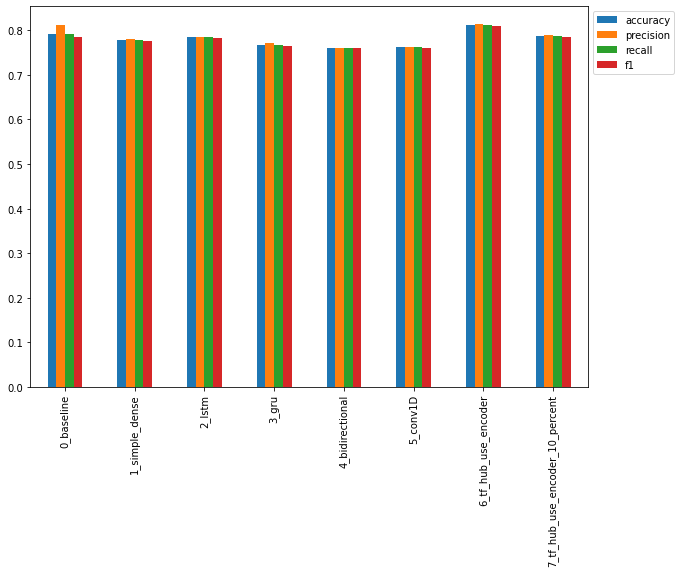

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

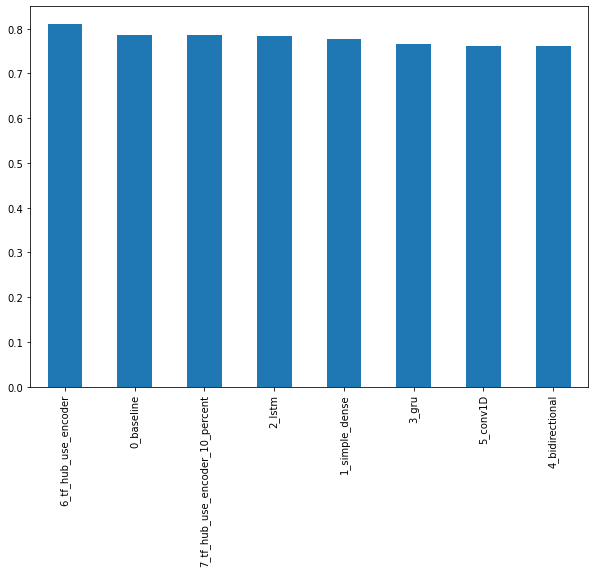

In [ ]:
# Sort model results by f1-scores
all_model_results.sort_values("f1",ascending=False)["f1"].plot(kind="bar", figsize=(10,7))

## Uploading our model training logs to TesnorBoard.dev

We can further inspect our model's performance using TensorBoard.dev: https://tensorboard.dev/

In [ ]:
# # View TensorBoard logs of transfer learning modelling experiments (plus all of our other models)
# # Upload TensorBoard dev records
# !tensorboard dev upload --logdir ./model_logs/ \
#   --name "NLP Modelling Experiments" \
#   --description "Comparing multiple different types of model architectures on the Kaggle Tweets text classification dataset" \
#   --one_shot # exit the uploader once uploading is finished

Now I've ran the cell above, my modelling experiments are visable on TensorBoard.dev: https://tensorboard.dev/experiment/G0xdzsDNQPGoaoxSeketDg/

> 📖 Resource: TensorBoard is great for quickly tracking experiments but for larger scale experiments and a whole bunch more tracking options, check out Weights & Biases: https://wandb.ai/site

In [ ]:
# # See the previous TensorBoard Dev experiments you've run...
# !tensorboard dev list

In [ ]:
# If you need to delete an experiment from TensorBoard, you can run the following:
# !tensorboard dev delete --experiment_id Eacboed3RbKPWIGcXe1Z6gB

## Saving and loading a trained model

There are two main formats to save a model to in TensorFlow:

1. The `HDF5` format
2. The `SavedModel` format (this is the default when using TensorFlow)

In [ ]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

In [ ]:
# Load model with custom Hub Layer (required HDF5 format)
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4291 - accuracy: 0.8110


[0.429126501083374, 0.8110235929489136]

Now let's save to the SavedModel format... (see more on this here: https://www.tensorflow.org/tutorials/keras/save_and_load)

In [ ]:
# Save TF Hub Sentence Ecnoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

In [ ]:
# Load in a model from the SavedModel format
loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
# Evaluate model in SavedModel format
loaded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4291 - accuracy: 0.8110


[0.42912644147872925, 0.8110235929489136]

As you can see saving and loading our model with either format results in the same performance.

🤔 Question: Should you used the SavedModel format or HDF5 format?

For most use cases, the SavedModel format will suffice. However, this is a TensorFlow specific standard. If you need a more general-purpose data standard, HDF5 might be better. For more, check out the TensorFlow documentation on saving and loading models.

## Finding the most wrong examples

* If our best model still isn't perfect, what examples is it getting wrong?
* And of these wrong examples which ones is it getting most wrong (those will predicition probabilities closest to the opposite class)

For example if a sample should have a label of 0 but our model predicts a prediction probability of 0.999 (really close to 1) and vice versa.

In [ ]:
# Download a pretrained model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip 

--2023-02-08 04:00:25--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.196.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M   154MB/s    in 6.8s    

2023-02-08 04:00:32 (134 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variable

In [ ]:
# Import previously trained model from Google Storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [ ]:
# Make predictions with the loaded model from GS
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]  # these should be in label format

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create DataFrame with validation sentences, validation labels and best performing model prediction labels + probabilities
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
# Find the most wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]  # these are false positives

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [ ]:
most_wrong.tail()  # these are false negatives

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


Let's remind ourselves of the target labels...

* 0 = not diaster
* 1 = diaster

In [ ]:
# Check the false positives (model predicted 1 when it should've been 0)
for row in most_wrong[:10].itertuples():
  _,text,target,pred,pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print(f"---\n")

Target: 0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

---

Target: 0, Pred: 1.0, Prob: 0.8769821524620056
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

---

Target: 0, Pred: 1.0, Prob: 0.8523001074790955
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

---

Target: 0, Pred: 1.0, Prob: 0.8354544043540955
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

---

Target: 0, Pred: 1.0, Prob: 0.8272132873535156
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

---

Target: 0, Pred: 1.0, Prob: 0.8148158192634583
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

---

Tar

In [ ]:
# Check the false negatives (model predicted 1 when it should've been 0)
for row in most_wrong[-10:].itertuples():
  _,text,target,pred,pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print(f"---\n")

Target: 1, Pred: 0.0, Prob: 0.06730347871780396
Text:
@DavidVonderhaar At least you were sincere ??

---

Target: 1, Pred: 0.0, Prob: 0.05507579818367958
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

---

Target: 1, Pred: 0.0, Prob: 0.05460338667035103
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

---

Target: 1, Pred: 0.0, Prob: 0.054596975445747375
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

---

Target: 1, Pred: 0.0, Prob: 0.04963728412985802
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

---

Target: 1, Pred: 0.0, Prob: 0.043918490409851074
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

---

Target: 1, Pred: 0.0, Prob: 0.042086

In [ ]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


## Making predictions on the test dataset

In [ ]:
# Making predictions on the test dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))  # our model expects a list as input
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred_prob)}, Prob: {pred}")
  print(f"Text:\n{test_sample}\n")
  print(f"-----\n")

1/1 [==============================] - 0s 49ms/step
Pred: 0, Prob: 0.0
Text:
AxWave enables a fast and accurate simulation of 2D and 3D seismic surveys in an acoustic medium #seismic #GPU #CPU http://t.co/OMX1NXAqpz

-----

1/1 [==============================] - 0s 44ms/step
Pred: 0, Prob: 0.0
Text:
@bexrayandvav if it makes you feel better we have started panicking about how close freshers is and how unprepared we are :l

-----

1/1 [==============================] - 0s 39ms/step
Pred: 0, Prob: 0.0
Text:
Corey White talking all dat shit but he got burned more than curlin irons on black women necks

-----

1/1 [==============================] - 0s 39ms/step
Pred: 0, Prob: 0.0
Text:
Interview on The Collapse of Materialism Best #TalkRadio Listen Live: http://t.co/ncMBnRsk5Q

-----

1/1 [==============================] - 0s 37ms/step
Pred: 0, Prob: 1.0
Text:
Acting Public Information Officer (PIO) Until Monday August 10 http://t.co/FEBu2dH9Hs http://t.co/DsxV9p4eBz

-----

1/1 [=========

## Challenge - predicting on Tweets from the wild

Go to your favourite Twitter account and copy one of their latest Tweets.

Then pass that Tweet through our trained model.

Is that Tweet a disaster or not disaster (according to the model)? Is the model right or wrong?

## The speed/score tradeoff

In [ ]:
# Let's make a function to measure the time of prediction 
import time
def pred_timer(model,samples):
  """
  Times how long a model takes to make a prediction
  """
  start_time = time.perf_counter()  # get start time
  model.predict(samples)  # make predictions
  end_time = time.perf_counter()  # get finish time
  total_time = end_time - start_time  # calculate how long predictions took to make
  time_per_pred = total_time/len(samples)
  return total_time , time_per_pred

In [ ]:
# Calculate TF Hub Sentence Encoder time per pred 
model_6_total_pred_time , model_6_time_per_pred = pred_timer(model=model_6_pretrained,
                                                             samples=val_sentences)
model_6_total_pred_time , model_6_time_per_pred

24/24 [==============================] - 0s 18ms/step


(0.5353259680000519, 0.0007025275170604356)

In [ ]:
# Calculate our baseline model times per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model=model_0,
                                                              samples=val_sentences)
baseline_total_pred_time , baseline_time_per_pred

(0.038346688999808975, 5.032373884489367e-05)

In [ ]:
# Get results for pretrained GS model
model_6_pretrained_results = calculate_results(y_true=val_labels,
                                               y_pred=model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

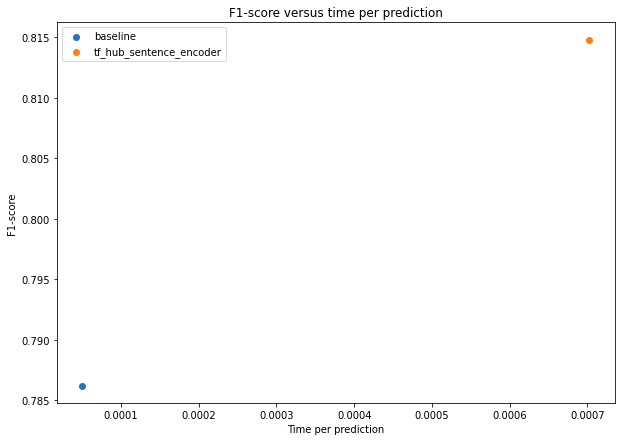

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"],label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score");